In [1]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
# Declare each array as a variable. lats and lngs

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Pack the latitudes and longitudes as pairs by zipping them (lat_lngs) with the zip() function.
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.

from citipy import citipy

In [5]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

616

In [6]:
# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 

import time

# Import the datetime module from the datetime library.

from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")


# Create counters.

record_count = 1

set_count = 1

# Loop through all the cities in the list.

for i, city in enumerate(cities):
    

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")
    

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        
        print("City not found. Skipping...")
        
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sitka
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | naryan-mar
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | norman wells
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | poronaysk
Processing Record 14 of Set 1 | miramar
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | pangnirtung
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | yulara
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | pis

Processing Record 38 of Set 4 | saint-augustin
Processing Record 39 of Set 4 | nara
Processing Record 40 of Set 4 | hasaki
Processing Record 41 of Set 4 | tecolutla
Processing Record 42 of Set 4 | shahrud
Processing Record 43 of Set 4 | kralendijk
Processing Record 44 of Set 4 | kalashnikovo
Processing Record 45 of Set 4 | talnakh
Processing Record 46 of Set 4 | paamiut
Processing Record 47 of Set 4 | hithadhoo
Processing Record 48 of Set 4 | hudson bay
Processing Record 49 of Set 4 | nome
Processing Record 50 of Set 4 | payyannur
Processing Record 1 of Set 5 | katha
City not found. Skipping...
Processing Record 2 of Set 5 | oga
Processing Record 3 of Set 5 | isla mujeres
Processing Record 4 of Set 5 | astana
Processing Record 5 of Set 5 | at-bashi
Processing Record 6 of Set 5 | honiara
Processing Record 7 of Set 5 | mwinilunga
Processing Record 8 of Set 5 | weymouth
Processing Record 9 of Set 5 | inta
Processing Record 10 of Set 5 | brodokalmak
Processing Record 11 of Set 5 | kahului


Processing Record 31 of Set 8 | sebrovo
Processing Record 32 of Set 8 | tomatlan
Processing Record 33 of Set 8 | ewa beach
Processing Record 34 of Set 8 | sola
Processing Record 35 of Set 8 | port-gentil
Processing Record 36 of Set 8 | alice springs
Processing Record 37 of Set 8 | muravlenko
Processing Record 38 of Set 8 | hamilton
Processing Record 39 of Set 8 | novyy urengoy
Processing Record 40 of Set 8 | ust-ilimsk
Processing Record 41 of Set 8 | pitimbu
Processing Record 42 of Set 8 | enshi
Processing Record 43 of Set 8 | irati
Processing Record 44 of Set 8 | yamethin
Processing Record 45 of Set 8 | yithion
City not found. Skipping...
Processing Record 46 of Set 8 | atar
Processing Record 47 of Set 8 | bonavista
Processing Record 48 of Set 8 | port augusta
Processing Record 49 of Set 8 | kultuk
Processing Record 50 of Set 8 | volgo-kaspiyskiy
Processing Record 1 of Set 9 | gariaband
Processing Record 2 of Set 9 | souillac
Processing Record 3 of Set 9 | florianopolis
Processing Rec

Processing Record 15 of Set 12 | adre
Processing Record 16 of Set 12 | mbandaka
Processing Record 17 of Set 12 | sabang
Processing Record 18 of Set 12 | namanyere
Processing Record 19 of Set 12 | artyk
City not found. Skipping...
Processing Record 20 of Set 12 | mundo nuevo
Processing Record 21 of Set 12 | baracoa
Processing Record 22 of Set 12 | keetmanshoop
Processing Record 23 of Set 12 | lima
Processing Record 24 of Set 12 | macas
Processing Record 25 of Set 12 | kurilsk
Processing Record 26 of Set 12 | pedreiras
Processing Record 27 of Set 12 | enumclaw
Processing Record 28 of Set 12 | kudahuvadhoo
Processing Record 29 of Set 12 | gornopravdinsk
Processing Record 30 of Set 12 | salinas
Processing Record 31 of Set 12 | verkhovazhye
Processing Record 32 of Set 12 | labuan
Processing Record 33 of Set 12 | srednyaya akhtuba
Processing Record 34 of Set 12 | chiang kham
Processing Record 35 of Set 12 | steinbach
Processing Record 36 of Set 12 | frutal
Processing Record 37 of Set 12 | im

In [10]:
len(city_data)

565

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sitka,57.0531,-135.3300,48.09,61,20,4.61,US,2022-04-21 20:51:55
1,Hilo,19.7297,-155.0900,91.27,69,75,5.99,US,2022-04-21 20:48:44
2,Avarua,-21.2078,-159.7750,78.85,61,40,12.66,CK,2022-04-21 20:50:12
3,Lebu,-37.6167,-73.6500,55.11,98,100,7.83,CL,2022-04-21 20:51:55
4,Victoria,22.2855,114.1577,75.38,88,55,4.00,HK,2022-04-21 20:51:12
5,Naryan-Mar,67.6713,53.0870,6.78,100,92,3.58,RU,2022-04-21 20:51:56
6,Jamestown,42.0970,-79.2353,57.02,74,100,16.11,US,2022-04-21 20:47:48
7,Khatanga,71.9667,102.5000,-4.76,100,86,6.40,RU,2022-04-21 20:51:56
8,Ponta Do Sol,32.6667,-17.1000,63.72,68,59,10.36,PT,2022-04-21 20:51:56
9,Norman Wells,65.2820,-126.8329,26.64,54,40,11.50,CA,2022-04-21 20:51:57


In [12]:
# Reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sitka,US,2022-04-21 20:51:55,57.0531,-135.3300,48.09,61,20,4.61
1,Hilo,US,2022-04-21 20:48:44,19.7297,-155.0900,91.27,69,75,5.99
2,Avarua,CK,2022-04-21 20:50:12,-21.2078,-159.7750,78.85,61,40,12.66
3,Lebu,CL,2022-04-21 20:51:55,-37.6167,-73.6500,55.11,98,100,7.83
4,Victoria,HK,2022-04-21 20:51:12,22.2855,114.1577,75.38,88,55,4.00
5,Naryan-Mar,RU,2022-04-21 20:51:56,67.6713,53.0870,6.78,100,92,3.58
6,Jamestown,US,2022-04-21 20:47:48,42.0970,-79.2353,57.02,74,100,16.11
7,Khatanga,RU,2022-04-21 20:51:56,71.9667,102.5000,-4.76,100,86,6.40
8,Ponta Do Sol,PT,2022-04-21 20:51:56,32.6667,-17.1000,63.72,68,59,10.36
9,Norman Wells,CA,2022-04-21 20:51:57,65.2820,-126.8329,26.64,54,40,11.50


In [22]:
# Create the output file (CSV).

output_data_file = "weather-data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

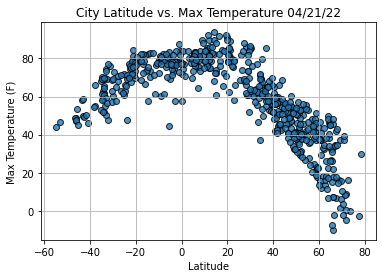

In [24]:
# Import time module

import time


# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather-data/Fig1.png")


# Show plot.

plt.show()

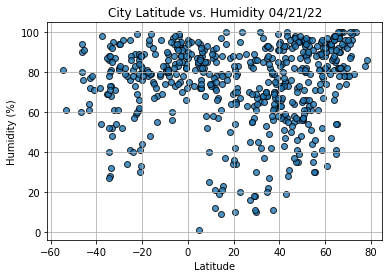

In [25]:
# Build the scatter plot for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather-data/Fig2.png")


# Show plot.

plt.show()

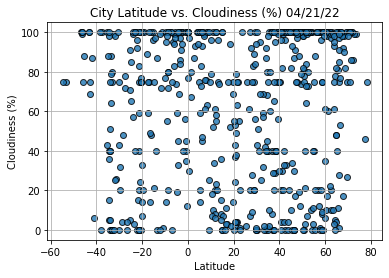

In [26]:
# Build the scatter plot for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather-data/Fig3.png")


# Show plot.

plt.show()

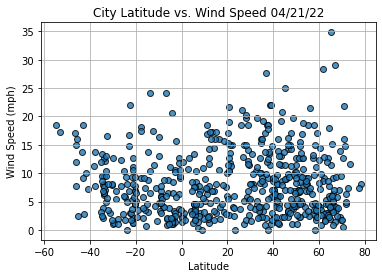

In [27]:
# Build the scatter plot for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather-data/Fig4.png")


# Show plot.

plt.show()

In [32]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()

In [33]:
index13 = city_data_df.loc[13]

index13

City                      Miramar
Country                        US
Date          2022-04-21 20:51:58
Lat                       25.9873
Lng                      -80.2323
Max Temp                     82.0
Humidity                       63
Cloudiness                     75
Wind Speed                  18.41
Name: 13, dtype: object

In [34]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
560     True
561     True
562    False
563     True
564     True
Name: Lat, Length: 565, dtype: bool

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sitka,US,2022-04-21 20:51:55,57.0531,-135.3300,48.09,61,20,4.61
1,Hilo,US,2022-04-21 20:48:44,19.7297,-155.0900,91.27,69,75,5.99
4,Victoria,HK,2022-04-21 20:51:12,22.2855,114.1577,75.38,88,55,4.00
5,Naryan-Mar,RU,2022-04-21 20:51:56,67.6713,53.0870,6.78,100,92,3.58
6,Jamestown,US,2022-04-21 20:47:48,42.0970,-79.2353,57.02,74,100,16.11


In [36]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

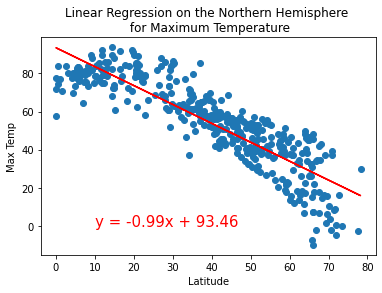

In [91]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,0))

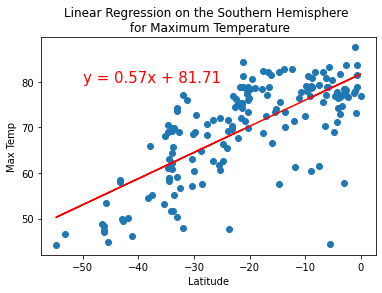

In [92]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

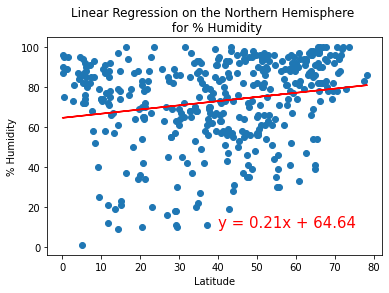

In [93]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

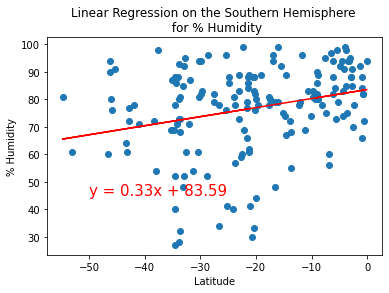

In [101]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,45))

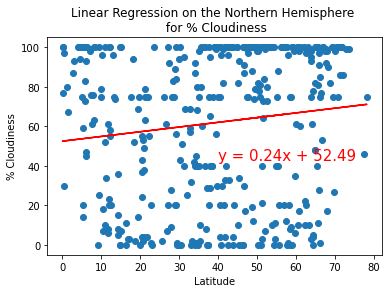

In [121]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,43))

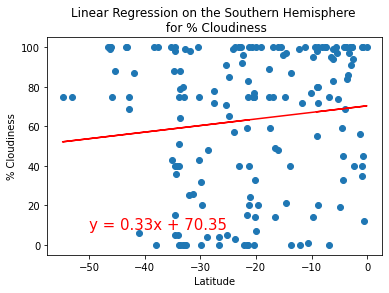

In [113]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,8))

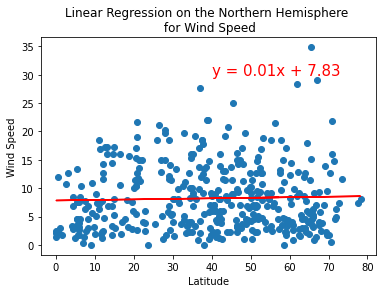

In [116]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

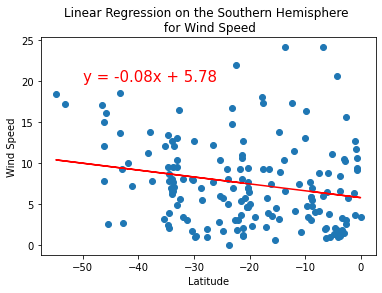

In [118]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))